authors: Toufik & Asma
Dans cette partie on va créer l'ensemble des services proposés à partir de la base de données
qu"on a prealablement créé

In [3]:
# Import modules
import pandas as pd
import mysql.connector
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Connect to database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="SadikaSydney99",
  database="insertion_pro",
  auth_plugin='mysql_native_password'
)
mycursor = mydb.cursor()

In [5]:
# Afficher tout les établissements qui ont changé de nom
mycursor.execute("SELECT nom_etablissement, nom_etablissement_actuel FROM etablissement WHERE nom_etablissement_actuel != nom_etablissement")
myresult = mycursor.fetchall()
# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

nom_etablissement = df[0]
nom_etablissement_actuel = df[1]

# afficher DataFrame
df

,0,1
0,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA)
1,Bordeaux 1 - Sciences technologies,Université de Bordeaux
2,Bordeaux 2 - Victor Segalen,Université de Bordeaux
3,Bordeaux 4 - Montesquieu,Université de Bordeaux
4,Montpellier 1,Université de Montpellier
5,Montpellier 2 - Sciences techniques du Languedoc,Université de Montpellier
6,Grenoble 1 - Joseph Fourier,Université Grenoble Alpes (UGA)
7,Grenoble 2 - Pierre Mendès France,Université Grenoble Alpes (UGA)
8,Grenoble 3 - Stendhal,Université Grenoble Alpes (UGA)
9,Grenoble Alpes,Université Grenoble Alpes (UGA)


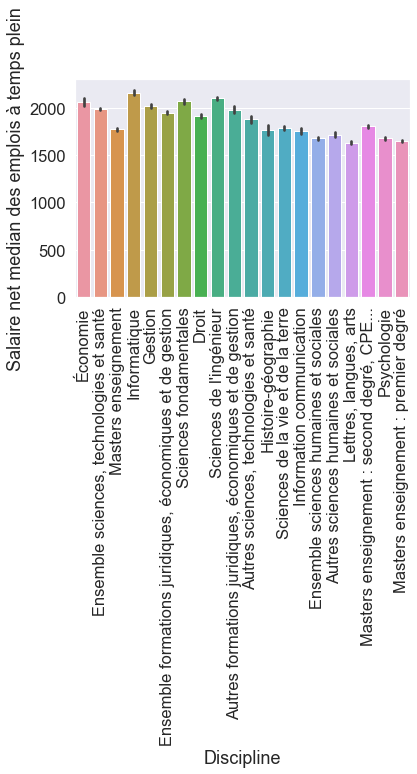

In [6]:
# Afficher les salaire_net_median_des_emplois_a_temps_plein les plus élevé et la discpline correspondante et l'établissement
mycursor.execute("SELECT nom_discipline, salaire_net_median_des_emplois_a_temps_plein FROM Etablissement join Statistiques on Etablissement.id_etablissement = Statistiques.id_etablissement JOIN  Discipline on Statistiques.id_discipline = Discipline.id_discipline ORDER BY salaire_net_median_des_emplois_a_temps_plein DESC ")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

# Visualisation
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
sns.barplot(x=df[0], y=df[1])
# set Name on Horizontal axis
plt.xlabel("Discipline")
# set Name on Vertical axis
plt.ylabel("Salaire net median des emplois à temps plein")
# set Title
plt.title("")

# Set the names of the disipline inside the barplot
plt.xticks(rotation=90)
plt.show()

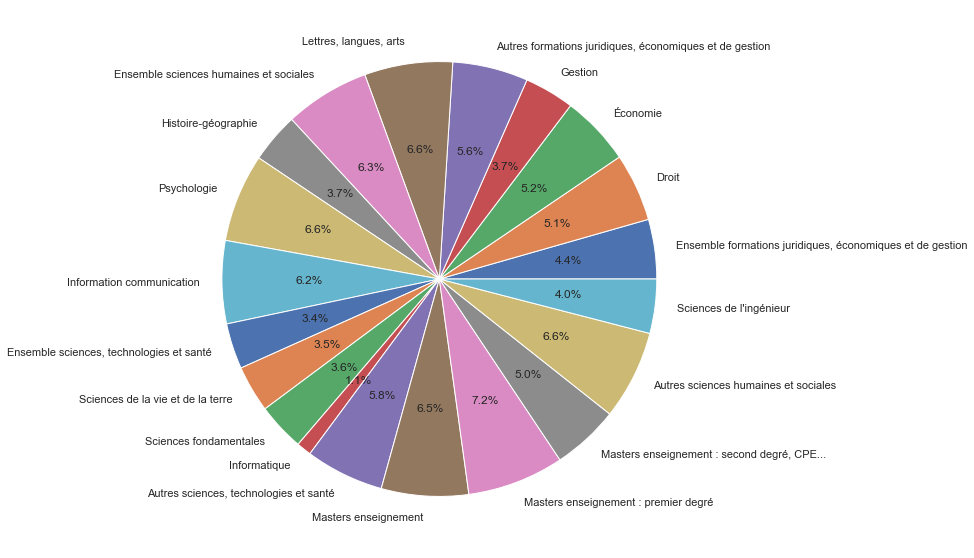

In [15]:
# Afficher la part des femmes par discipline non nulle
mycursor.execute("SELECT distinct nom_discipline, femmes FROM Discipline join Statistiques using (id_discipline) where femmes is not null group by nom_discipline")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)
 #visualisation des données
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")

sns.color_palette("bright")
plt.pie(df[1], labels=df[0], autopct='%1.1f%%');

In [35]:
#-- afficher la moyenne du salaire_net_median_des_emplois_a_temps_plein par année pour pour tout les noms des disciplines
mycursor.execute("select annee, avg(salaire_net_median_des_emplois_a_temps_plein), nom_discipline from enquete join statistiques using (annee, situation, diplome) join discipline on statistiques.id_discipline = discipline.id_discipline  GROUP BY annee, nom_discipline")
myresult = mycursor.fetchall()

# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)

df.columns = ['annee', 'salaire_net_median_des_emplois_a_temps_plein', 'nom_discipline']
df





,annee,salaire_net_median_des_emplois_a_temps_plein,nom_discipline
0,2010,1952.941176,"Ensemble formations juridiques, économiques et..."
1,2011,1942.641509,"Ensemble formations juridiques, économiques et..."
2,2012,1866.728972,"Ensemble formations juridiques, économiques et..."
3,2013,1873.551402,"Ensemble formations juridiques, économiques et..."
4,2014,1905.094340,"Ensemble formations juridiques, économiques et..."
...,...,...,...
158,2016,1834.459459,Masters enseignement
159,2017,1779.682540,Masters enseignement
160,2018,1780.588235,Masters enseignement
161,2011,1651.111111,Masters enseignement : premier degré


In [36]:
# Affichage du salaire_net_median_des_emplois_a_temps_plein le plus élevé et le nom de  discpline correspondante et  le nom de l'établissement
mycursor.execute("select max(salaire_net_median_des_emplois_a_temps_plein), nom_etablissement, nom_discipline from statistiques join discipline on statistiques.id_discipline = discipline.id_discipline join etablissement on statistiques.id_etablissement = etablissement.id_etablissement")
myresult = mycursor.fetchall()
# Conversion des résultats en dataframe
df = pd.DataFrame(myresult)
df.columns = ['salaire_net_median_des_emplois_a_temps_plein', 'nom_etablissement', 'nom_discipline']


,0,1,2
0,3150.0,Nice - Sophia-Antipolis,"Masters enseignement : second degré, CPE..."


In [68]:
# Affichage des moyenne salaire_net_mensuel_median_regional et de nom_académie correspondante par ordre décroissant en éliminant les doublons
mycursor.execute("select distinct nom_academie , avg(salaire_net_mensuel_median_regional) as moyfrom statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie group by nom_academie having moy is not null ")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)


#visualisation des données par histogramme en matplotlib

 # sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
# ax = sns.barplot(x=df[0], y=df[1], palette="Blues_d")


    

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'statistiques join etablissement on statistiques.id_etablissement = etablissement' at line 1

In [63]:
# Affichage le taux_insertion par academie
mycursor.execute("select distinct taux_dinsertion, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie ORDER BY taux_dinsertion DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0,1
0,100.0,Paris
1,100.0,Aix-Marseille
2,100.0,Besançon
3,100.0,Bordeaux
4,100.0,Caen
...,...,...
837,NaN,Créteil
838,NaN,Versailles
839,NaN,Corse
840,NaN,La Réunion


In [62]:
# Affichage de toutes les université qui ont changé de nom
mycursor.execute("select distinct nom_etablissement, nom_etablissement_actuel from etablissement where nom_etablissement_actuel IS NOT NULL")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0,1
0,Nice - Sophia-Antipolis,Université Côte d'Azur (UCA)
1,Bordeaux 1 - Sciences technologies,Université de Bordeaux
2,Bordeaux 2 - Victor Segalen,Université de Bordeaux
3,Bordeaux 4 - Montesquieu,Université de Bordeaux
4,Montpellier 1,Université de Montpellier
5,Montpellier 2 - Sciences techniques du Languedoc,Université de Montpellier
6,Grenoble 1 - Joseph Fourier,Université Grenoble Alpes (UGA)
7,Grenoble 2 - Pierre Mendès France,Université Grenoble Alpes (UGA)
8,Grenoble 3 - Stendhal,Université Grenoble Alpes (UGA)
9,Grenoble Alpes,Université Grenoble Alpes (UGA)


In [71]:

#afficher le taux_chaomge_regional par academie
mycursor.execute("select distinct taux_de_chomage_regional, nom_academie from statistiques join etablissement on statistiques.id_etablissement = etablissement.id_etablissement join academie on etablissement.id_academie = academie.id_academie where taux_de_chomage_regional is Not NULL ORDER BY taux_de_chomage_regional DESC")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df


,0,1
0,20.1,La Réunion
1,19.4,Guadeloupe
2,17.4,La Réunion
3,14.3,Montpellier
4,14.0,Lille
...,...,...
208,6.7,Rennes
209,6.7,Nantes
210,6.6,Besançon
211,6.6,Dijon


In [74]:
#afficher l'année la plus récentede l'enquete la plus récente
mycursor.execute("select distinct annee from statistiques order by annee desc limit 1")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

,0
0,2018


In [76]:
# afficher les etablissement ayant les emplois stables les plus elevé 
mycursor.execute("select sum(emplois_stables), nom_etablissement from statistiques join etablissement GROUP BY nom_etablissement ORDER BY sum(emplois_stables) DESC ")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df


,0,1
0,523640.0,La Réunion
1,523640.0,Antilles
2,523640.0,Corse Pasquale Paoli
3,523640.0,Cergy-Pontoise
4,523640.0,Paris-Est Créteil
...,...,...
80,523640.0,La Rochelle
81,523640.0,Caen Normandie
82,523640.0,Aix-Marseille
83,523640.0,Université de technologie de Troyes


In [77]:
# afficher les etablissement ayant les emplois stables les plus elevé  pour l'année la plus récente
mycursor.execute("select sum(emplois_stables), nom_etablissement, annee from statistiques join etablissement GROUP BY nom_etablissement having (annee = max(annee)) ORDER BY sum(emplois_stables) DESC ")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df

""
